In [153]:
#importing libraries
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense,Flatten , Lambda , Input


In [154]:
#import Vgg16 model from keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

#for preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [155]:
#load and preprocess image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array


In [156]:
#import other libraries
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt




In [157]:
import os
#all files and directories in the currentdirectory
files = os.listdir()

# Print the list
for file in files:
    print(file)

.config
drive
sample_data


In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
train_path =("/content/drive/MyDrive/2. Datasets/2. BasicFace Images/Final Training Images")
test_path=("/content/drive/MyDrive/2. Datasets/2. BasicFace Images/Final Testing Images")

In [83]:
model = VGG16(input_shape=(224,224, 3) ,weights = 'imagenet', include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [84]:
for layer in model.layers:
  layer.trainable=False

In [85]:
Folder = glob("/content/drive/MyDrive/2. Datasets/2. BasicFace Images/Final Testing Images/*")

flatten the output of model

In [86]:
x = Flatten()(model.output)

In [87]:
y=len (Folder)


In [88]:
print(y)

16


In [89]:
predictions = Dense(y,activation= "softmax")(x)

## Final vgg model using transfer learning

In [90]:
model = Model(inputs = model.input,outputs= predictions)

In [91]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

⏰# **Important NOTES**

---



---


##image size decrease ,channel increase
##padding - TO attain the size of image

##pooling - to reduce the size of image ,no parrameter to learn in pooling

In [92]:
# Print the trainable property of each layer
for layer in model.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [93]:
model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
        )

In [94]:
train_datagen = ImageDataGenerator (
    rescale = 1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

test_datagen= ImageDataGenerator(rescale=1/255)


In [95]:

training_set= train_datagen.flow_from_directory("/content/drive/MyDrive/2. Datasets/2. BasicFace Images/Final Training Images",target_size =(224,224),
                                                class_mode="categorical")

Found 244 images belonging to 16 classes.


In [96]:
testing_set= test_datagen.flow_from_directory("/content/drive/MyDrive/2. Datasets/2. BasicFace Images/Final Testing Images",target_size =(224,224),
                                               class_mode="categorical")


Found 64 images belonging to 16 classes.


In [97]:
#load inage from a directory
image = load_img("/content/drive/MyDrive/2. Datasets/2. BasicFace Images/Final Testing Images/face14/1face14.jpg",target_size=(224,224))

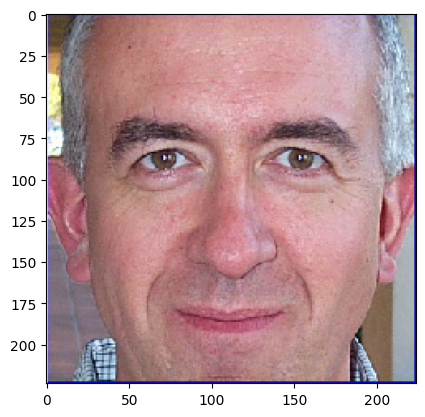

In [98]:
plt.imshow(image)

In [99]:
image2= load_img("/content/drive/MyDrive/2. Datasets/2. BasicFace Images/Final Testing Images/face12/2face12.jpg",target_size=(224,224))

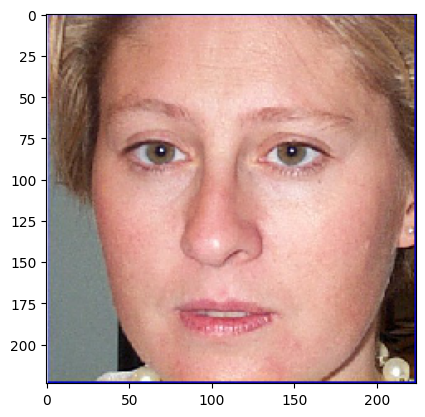

In [100]:
plt.imshow(image2)

In [155]:
final_model=model.fit(
    training_set,
    validation_data=testing_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set),
)

Epoch 1/20
8/8 [==============================] - 6s 563ms/step - loss: 3.7115 - accuracy: 0.1557 - val_loss: 1.9125 - val_accuracy: 0.3594
Epoch 2/20
8/8 [==============================] - 4s 546ms/step - loss: 1.6788 - accuracy: 0.4836 - val_loss: 1.0531 - val_accuracy: 0.7969
Epoch 3/20
8/8 [==============================] - 6s 665ms/step - loss: 0.8308 - accuracy: 0.8402 - val_loss: 0.5199 - val_accuracy: 0.8750
Epoch 4/20
8/8 [==============================] - 5s 573ms/step - loss: 0.4439 - accuracy: 0.9057 - val_loss: 0.3260 - val_accuracy: 0.9219
Epoch 5/20
8/8 [==============================] - 5s 627ms/step - loss: 0.2700 - accuracy: 0.9590 - val_loss: 0.1294 - val_accuracy: 0.9688
Epoch 6/20
8/8 [==============================] - 4s 570ms/step - loss: 0.1690 - accuracy: 0.9672 - val_loss: 0.1365 - val_accuracy: 0.9688
Epoch 7/20
8/8 [==============================] - 5s 590ms/step - loss: 0.1140 - accuracy: 0.9836 - val_loss: 0.1235 - val_accuracy: 0.9844
Epoch 8/20
8/8 [====

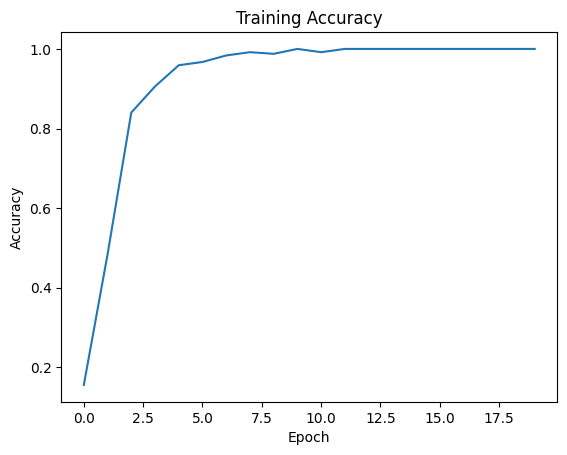

In [156]:
# Plotting the accuracy curve
plt.plot(final_model.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

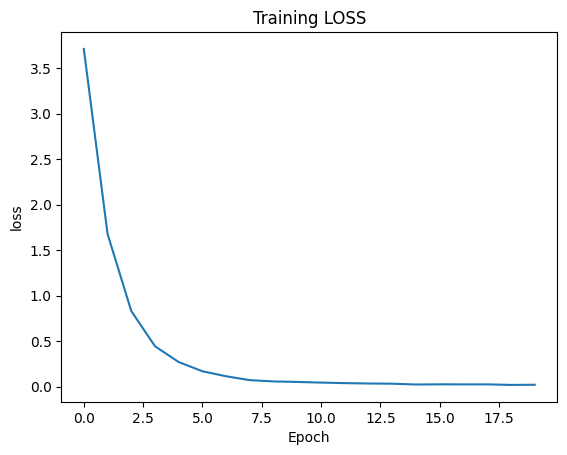

In [157]:
# Plotting the losss curve
plt.plot(final_model.history['loss'])
plt.title('Training LOSS')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

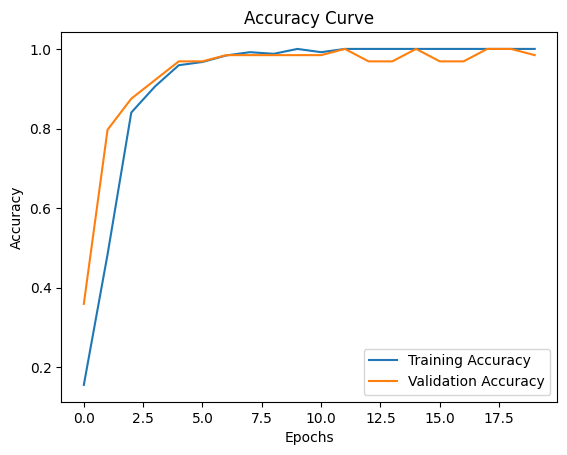

In [158]:
# Get accuracy values
accuracy = final_model.history['accuracy']
val_accuracy = final_model.history['val_accuracy']

# Plot accuracy curve
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


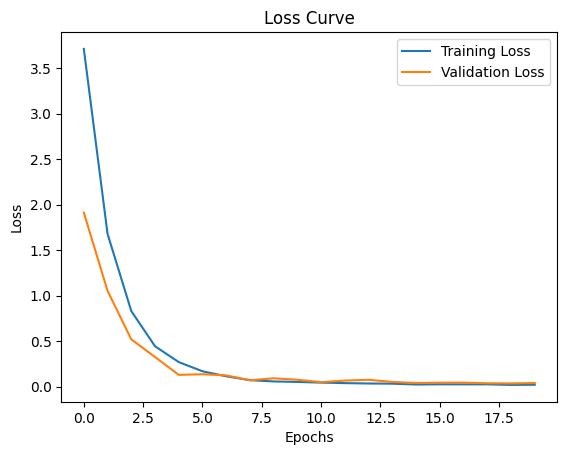

In [159]:

# Get loss values
loss = final_model.history['loss']
val_loss = final_model.history['val_loss']
# Plot loss curve
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [160]:
# Save the model
model.save("/content/drive/MyDrive/1. Colab Notebooks/5. June July  2023/2. Internship/MODEL 1 - Basic face dataset/model.h5")


In [1]:
from tensorflow.keras.models import load_model
model1=load_model("/content/drive/MyDrive/1. Colab Notebooks/5. June July  2023/2. Internship/MODEL 1 - Basic face dataset/model.h5")

In [2]:
model1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## Test1 - Unknown image

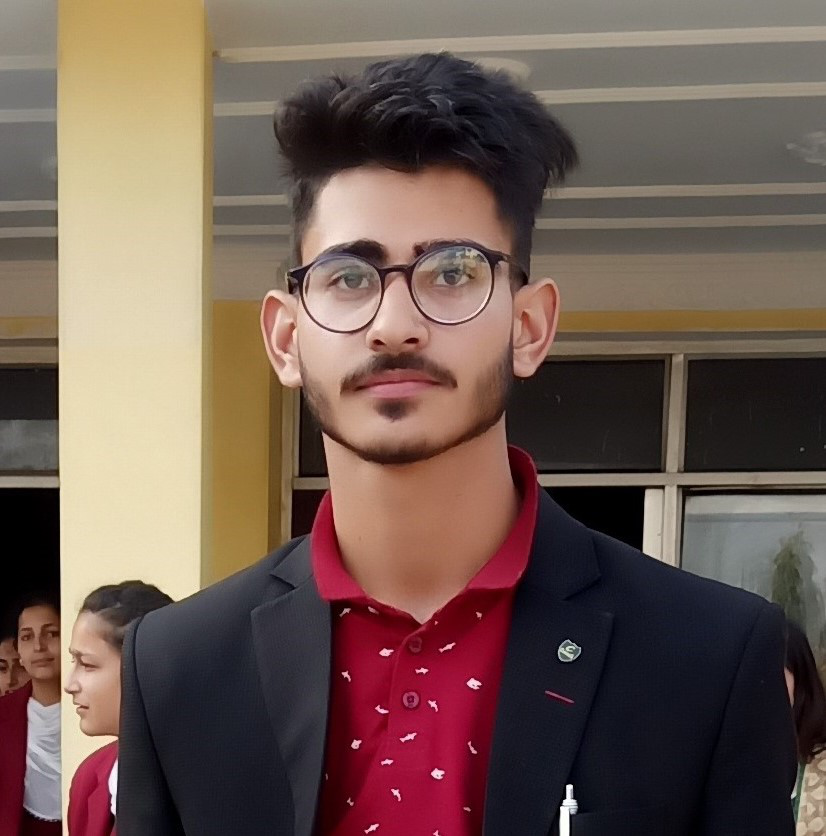

In [3]:
from PIL import Image

# Load the image
image = Image.open("/content/drive/MyDrive/1. Colab Notebooks/5. June July  2023/2. Internship/MODEL 1 - Basic face dataset/9. IMG20200208162152 (3).jpg")
image.show()


In [11]:
import numpy as np


In [12]:
import tensorflow as tf

#Resize the image
target_size = (224, 224)
image = image.resize(target_size)


In [13]:
# Convert the image to a NumPy array
image_array = tf.keras.preprocessing.image.img_to_array(image)

# Normalize
normalized_image_array = image_array / 255.0

# Expand the dimensions to create a batch of size 1
#This is commonly done when you want to pass a single image as input to a model that expects a batch of images
input_image = tf.expand_dims(normalized_image_array, axis=0)

In [14]:
print(np.shape(input_image))
print(np.shape(image))

(1, 224, 224, 3)
(224, 224, 3)


In [15]:
print( input_image )

tf.Tensor(
[[[[0.6117647  0.59607846 0.56078434]
   [0.60784316 0.5921569  0.5568628 ]
   [0.60784316 0.5921569  0.5568628 ]
   ...
   [0.5411765  0.5294118  0.49803922]
   [0.5411765  0.5294118  0.5019608 ]
   [0.54509807 0.53333336 0.5058824 ]]

  [[0.60784316 0.5921569  0.5568628 ]
   [0.6039216  0.5882353  0.5529412 ]
   [0.6039216  0.5882353  0.5529412 ]
   ...
   [0.5372549  0.5254902  0.49411765]
   [0.5372549  0.5254902  0.49803922]
   [0.5372549  0.5254902  0.49803922]]

  [[0.6        0.58431375 0.54901963]
   [0.59607846 0.5803922  0.54509807]
   [0.6        0.58431375 0.54901963]
   ...
   [0.53333336 0.52156866 0.49019608]
   [0.53333336 0.52156866 0.49411765]
   [0.53333336 0.52156866 0.49411765]]

  ...

  [[0.35686275 0.02745098 0.10196079]
   [0.36078432 0.02745098 0.10196079]
   [0.35686275 0.02745098 0.09803922]
   ...
   [0.74509805 0.67058825 0.58431375]
   [0.75686276 0.68235296 0.59607846]
   [0.67058825 0.6        0.5058824 ]]

  [[0.3647059  0.03137255 0.105882

In [16]:
# Assuming you have loaded and preprocessed the image as 'input_image' and have the loaded model as 'model'

# Perform prediction
predictions = model1.predict(input_image)

1/1 [==============================] - 7s 7s/step


In [18]:
class_labels = ['face1', 'face10', 'face11', 'face12', 'face13', 'face14', 'face15', 'face16', 'face2', 'face3', 'face4', 'face5', 'face6', 'face7', 'face8', 'face9']  # Replace with your class labels


In [21]:
# Get the predicted class index with the highest probability
predicted_class_index = np.argmax(predictions[0])

# Get the corresponding class label
class_labels = ['face1', 'face10', 'face11', 'face12', 'face13', 'face14', 'face15', 'face16', 'face2', 'face3', 'face4', 'face5', 'face6', 'face7', 'face8', 'face9']  # Replace with your class labels
predicted_class_label = class_labels[predicted_class_index]

# Get the predicted probability for the predicted class
predicted_probability = predictions[0][predicted_class_index]

In [108]:
print("Predicted class: ", predicted_class_label)
print("Probability of detection: ", predicted_probability)


Predicted class:  face9
Probability of detection:  5.7554257e-06


### Predicted class:  face9


## Probability of detection:  5.7554257e-06

## Test 3 - Known image belong to face 10 class

In [137]:
image2 = Image.open("/content/drive/MyDrive/2. Datasets/2. BasicFace Images/Final Testing Images/face10/1face10.jpg")

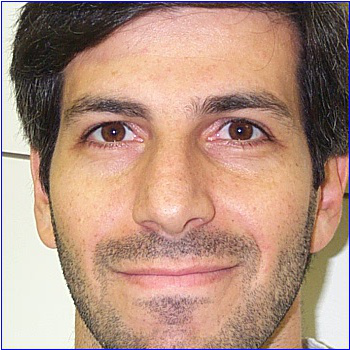

In [138]:
image2.show()

In [139]:
print(np.shape(image2))

(350, 350, 3)


In [140]:
image2=image2.resize(target_size)

In [141]:
image_array2 = tf.keras.preprocessing.image.img_to_array(image2)

In [142]:
normalized_image_array2 = image_array2 / 255.0


In [143]:
print(np.shape(normalized_image_array2))

(224, 224, 3)


In [144]:
input_image2 = tf.expand_dims(normalized_image_array2, axis=0)

In [145]:
print(np.shape(input_image2))

(1, 224, 224, 3)


In [146]:
predictions2 = model1.predict(input_image2)

1/1 [==============================] - 0s 32ms/step


In [147]:
print(predictions2)

[[1.2877179e-04 9.9778157e-01 1.6351299e-04 3.0071496e-05 8.1629853e-04
  2.3588078e-04 1.4722506e-06 2.5138859e-05 5.7554257e-06 2.3165862e-04
  7.5533804e-05 9.4630568e-06 1.0192848e-04 3.6026361e-06 2.1205402e-04
  1.7711153e-04]]


In [148]:
# Get the predicted class index with the highest probability
predicted_class_index2 = np.argmax(predictions2[0])

predicted_class_label2 = class_labels1[predicted_class_index2]

# Get the predicted probability for the predicted class
predicted_probability2 = predictions1[0][predicted_class_index2]

In [149]:
print("Predicted class: ", predicted_class_label2)
print("Probability of detection: ", predicted_probability2)


Predicted class:  face10
Probability of detection:  0.003421458


## Compare matching probability of this ime  with all other classes


In [101]:
matching_probabilities = []

In [102]:
# Iterate over each class label in the training set
for i, class_label in enumerate(class_labels1):
    # Get the predicted probability for the current class
    predicted_probability = predictions2[0][i]

    # Check if the predicted class matches the true class label
    is_matching = (predicted_class_index2 == i)

    # Append the class label and matching probability to the list
    matching_probabilities.append((class_label, predicted_probability))

In [103]:
# Create a list to store the matching probabilities and faces for each class
matching_results = []

In [105]:
# Print the class labels and their corresponding matching probabilities
for class_label, probability in matching_probabilities:
    print(f"Class: {class_label}, Matching Probability: {probability}")

Class: face1, Matching Probability: 0.00012877178960479796
Class: face10, Matching Probability: 0.9977815747261047
Class: face11, Matching Probability: 0.0001635129883652553
Class: face12, Matching Probability: 3.007149643963203e-05
Class: face13, Matching Probability: 0.0008162985322996974
Class: face14, Matching Probability: 0.00023588078329339623
Class: face15, Matching Probability: 1.4722505738973268e-06
Class: face16, Matching Probability: 2.5138859200524166e-05
Class: face2, Matching Probability: 5.755425718234619e-06
Class: face3, Matching Probability: 0.00023165861784946173
Class: face4, Matching Probability: 7.553380419267341e-05
Class: face5, Matching Probability: 9.463056812819559e-06
Class: face6, Matching Probability: 0.00010192848276346922
Class: face7, Matching Probability: 3.6026360703544924e-06
Class: face8, Matching Probability: 0.0002120540157193318
Class: face9, Matching Probability: 0.0001771115348674357


In [121]:
# Find the class label with the maximum matching probability
max_matching_probability = max(matching_probabilities, key=lambda x: x[1])

# Print the class label and its maximum matching probability
print(f"Class: {max_matching_probability[0]}, Maximum Matching Probability: {max_matching_probability[1]}")


Class: face10, Maximum Matching Probability: 0.9977815747261047


##CODE ENDS HERE.